# Hallucinating Scaffolds Training Sprint

Angelica Lam, angelicalam12@berkeley.edu        
Fenmiao Zhong, zfm0129@berkeley.edu    
Ivan Wang, ivanywang@berkeley.edu
      

Last Updated: Sep. 19, 2022

The Training Sprint is to provide theoretical fundation of our project. By completing this notebook, students will familiarize themselves with methods and papers critical to understanding of the project, feel comfortable with conducting experiments with current tools we are utilizing, and be ready to productively approach and work towards the overall project goal.

## Project Description

We want to design functional de novo proteins by taking the active site of an enzyme and "hallucinating," i.e., computationally generating, scaffolds for the active site such that the resulting de novo protein has the same catalytic function as the native enzyme. To study this system of algorithms, the original protein we have decided to focus on is TEM-1 beta-lactamase. This protein serves as a perfect model due to its simplicity. It has one active site, one ligand, one product, and naturally conferns antibiotic resistance in its host, which allows us to easily test for success in the wet-lab. 

## Team Resources

[Compiled Onboarding Instructions](https://docs.google.com/document/d/17xbfJbp_yvgyTTnEclzsANiZanfS-kSpfK6Q_ZBXD60/edit?usp=sharing)

Other resources can be found under iGEM google drive: Experimental Teams >> Computational Biology >> Protein Design Team >> Hallucinating Scaffold

## What should you do first?

The vast majority of our code is difficult to run locally. APPLY FOR AN ACCOUNT ON BERKELEY'S SAVIO CLUSTER AS SOON AS POSSIBLE!

1. Go to https://mybrc.brc.berkeley.edu/ and open an account.
2. Sign the "BRC User Access Agreement Form".
3. Apply to the fc_igemcomp project.
4. Wait for an email about approval from "project managers".
5. Wait for an email about approval from admin.
6. Set up Google Authenticator to get One-Time-Passwords (OTP).

Detailed instructions about Savio usage: https://igemberkeley.notion.site/Savio-Notes-9ae34891b02b4835a5f2cda71393f4f3

Savio system overview: https://docs-research-it.berkeley.edu/services/high-performance-computing/overview/system-overview

## Methods and Tools

Rosetta, Tischer's Model, trDesign, AlphaFold, Protein Data Bank

### Rosetta

Rosetta is a software suite developed by Dr. David Baker's lab at the University of Washington, including algorithms for computational modeling and analysis of protein structures. It started as a structure prediction tool, and has been adapted to solve common computational macromolecular problems since then. It has enabled notable scientific advances in computational biology, including de novo protein design, enzyme design, ligand docking, and structure prediction of biological macromolecules and macromolecular complexes.

Release Notes: https://www.rosettacommons.org/docs/latest/release-notes

### Protein Design Models

#### Tischer's Model
Tischer's model (trRosetta-based protein hallucination) is a package for protein hallucination through the structure-prediction neural network trRosetta. Prediction is subject to two mutually exclusive terms of the loss functions. The motif satisfaction term is the categorical cross entropy between the predicted  distribution and the motif one-hot encoding.rewards de novo protein structures that have the contigs (i.e., active site) in the same geometry as they are in the native enzyme. The free hallucination term is the negative KL divergence between the predicted distribution and a background distribution, which represents the average trRosetta prediction for a protein of the given length.It rewards de novo proteins whose structures are indicative of a computationally well-folded protein.

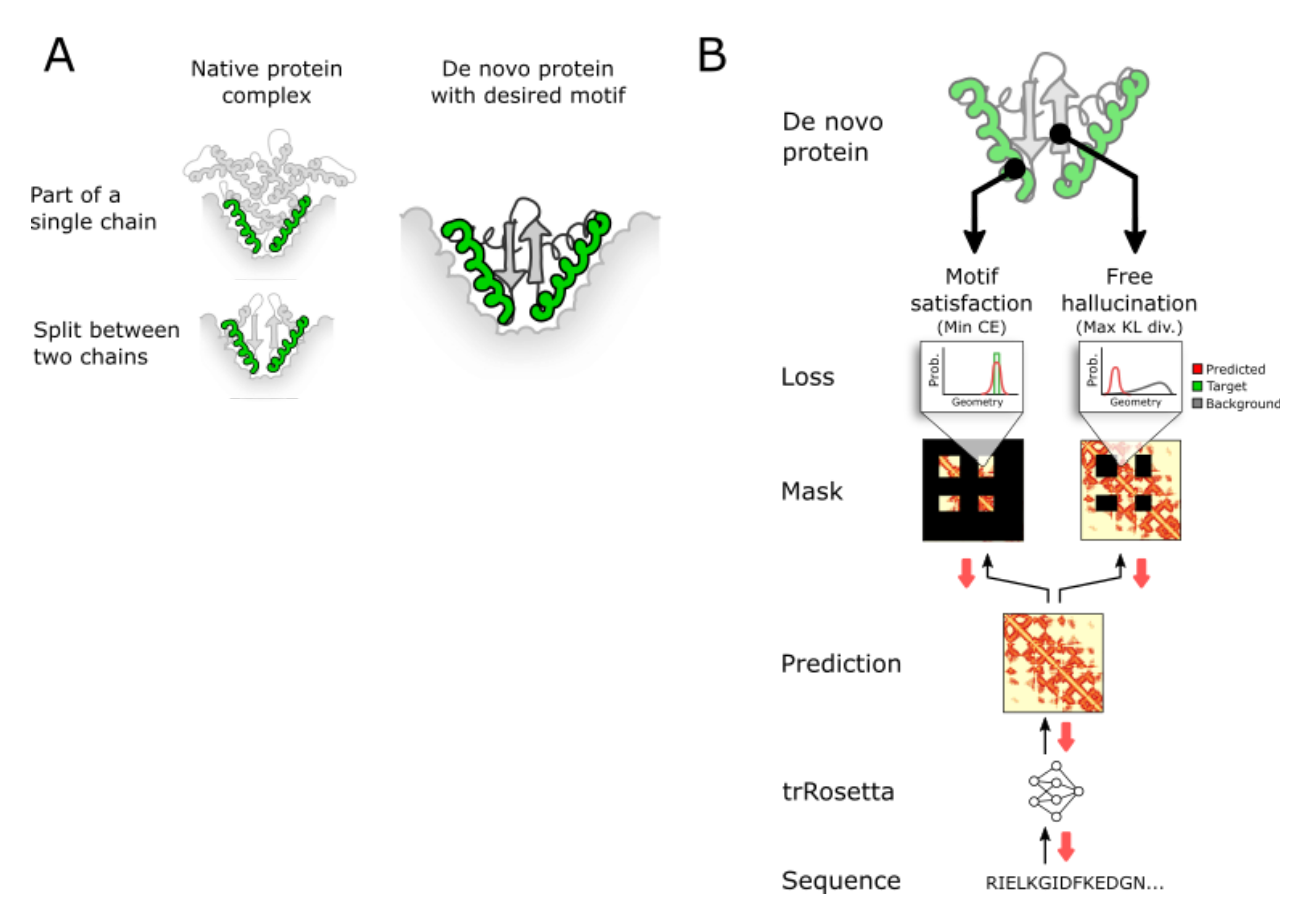

Package: https://github.com/gjoni/trDesign
https://github.com/dtischer/trdesign-motif

#### trDesign
trDesign (trRosetta for protein design) is a package of free hallucination and fully constrained fix-backbone sequence design using trRosetta. It summarizes developments on trRossetta structure prediction network for various protein design applications. 

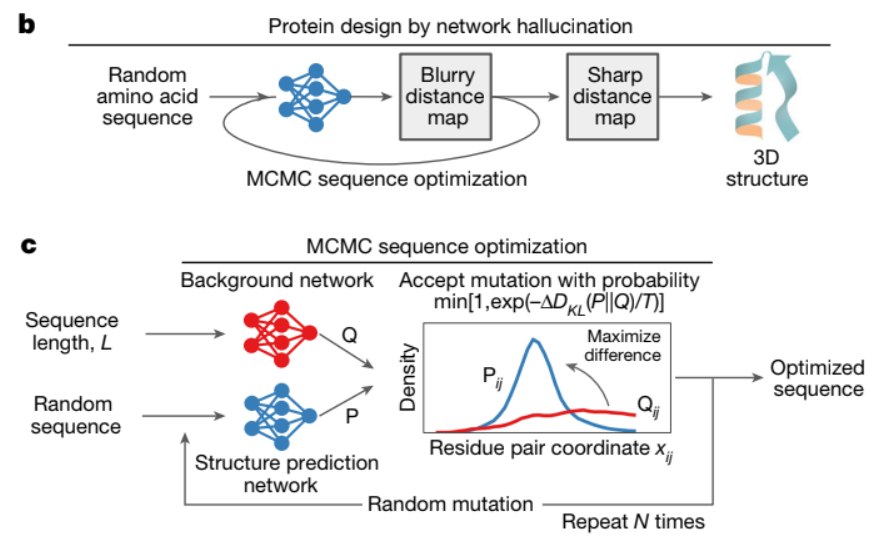

Package: https://github.com/gjoni/trDesign

#### trRosetta
trRosetta is a package utilizing convolutional neural network to predict protein inter-residue geometries from a multiple sequence alignment or a single sequence.

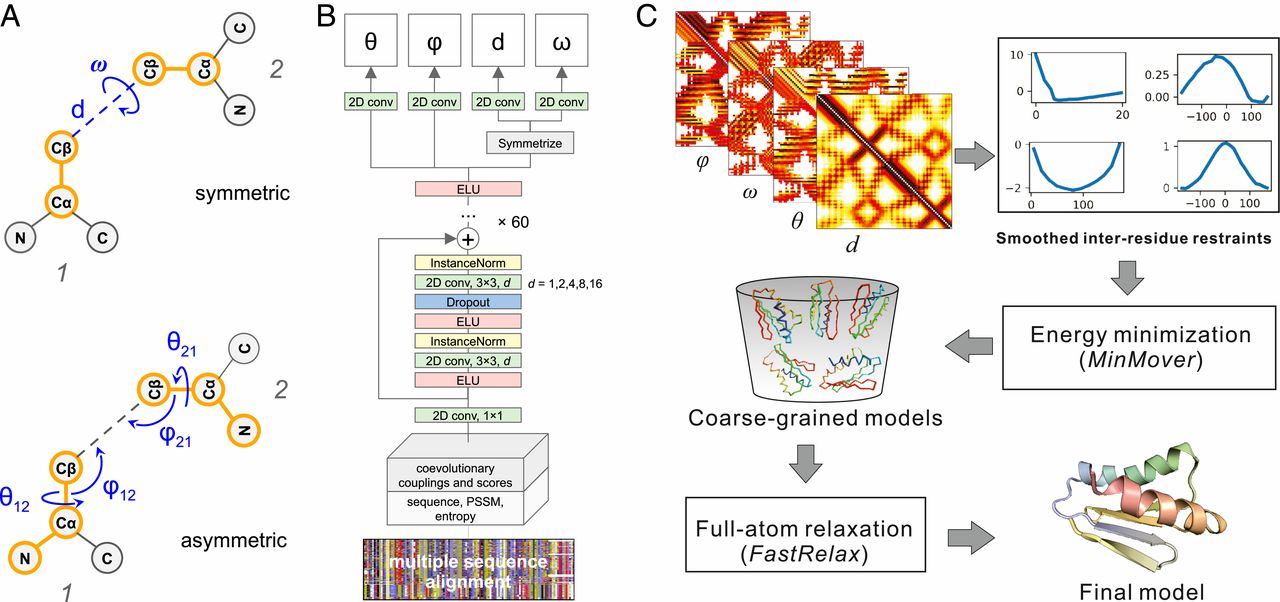

Package: https://github.com/gjoni/trRosetta

### AlphaFold
AlphaFold is an artificial intelligence (AI) program developed by Alphabet's/Google's DeepMind which performs predictions of protein structure.The program is designed as a deep learning system. 

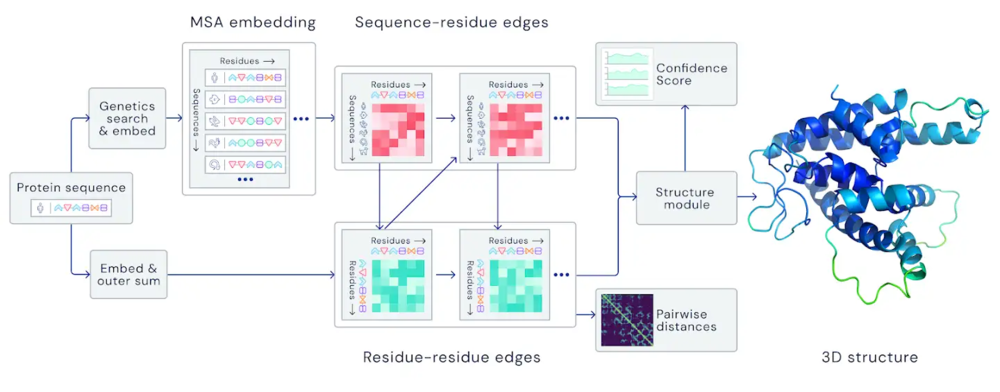

Google Colab: https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb#scrollTo=kOblAo-xetgx

AlphaFold Protein Structure Database: https://alphafold.ebi.ac.uk/

### Protein Data Bank
Protein Data Bank is a single worldwide archive of structural data of biological macromolecules.
[PDB Basic Tutorial](https://www.youtube.com/watch?v=DgVfSQUSdlk) has a brief tour of the website and a basic introduction on how to use it. [PDB File Structure](https://www.youtube.com/watch?v=Xq9EHBJ80G8) provides a overview of pdb file components and how to interpret it.

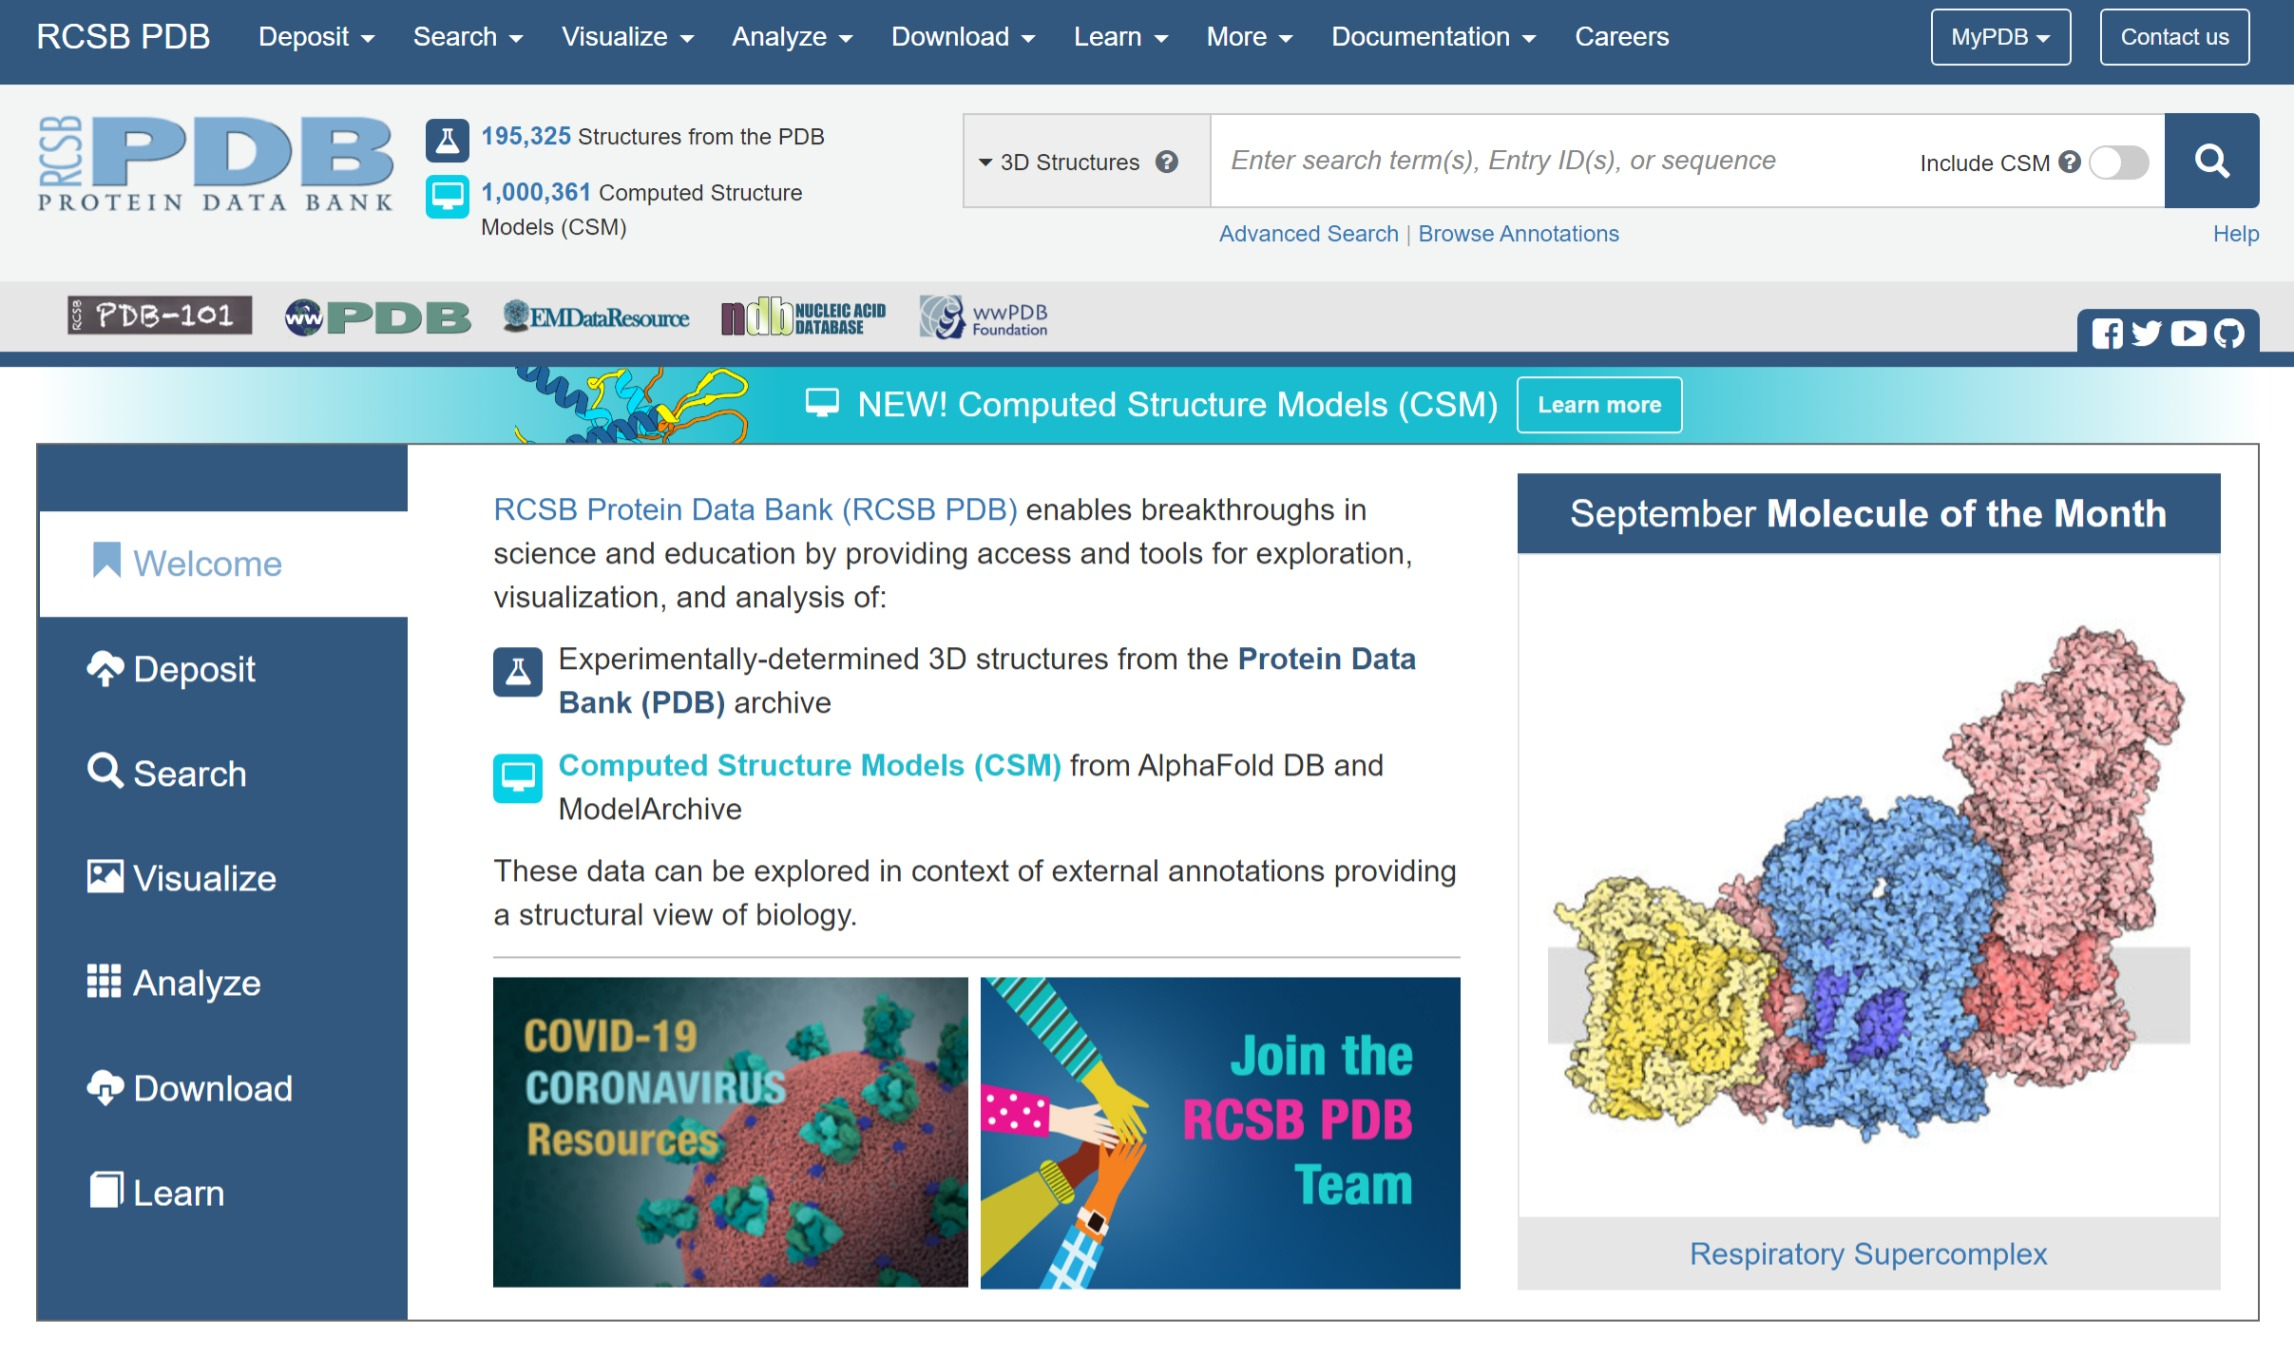

## What is our pipeline for designing de novo proteins?

1.First, pick an enzyme and identify its active site. We are restricted to small-size,relatively simple enzymes that have a single active site whose catalytic activity is easy to assay in wetlab. After choosing an enzyme, we need to identify its catalytic residues (amino acids) and active site.This step requires you to search through existing literature on the enzyme. Then go to [Protein Data Bank](https://www.rcsb.org) to download pdb file for the enzyme you pick and search for potential active sites on [Mechanism and Catalytic Sites Atlas](https://www.ebi.ac.uk/thornton-srv/m-csa/) or through literature.

[PDB Basic Tutorial](https://www.youtube.com/watch?v=DgVfSQUSdlk)   
[PDB File Structure](https://www.youtube.com/watch?v=Xq9EHBJ80G8)

2.Next, we need to generate a "starter" de novo amino acid sequence. This sequence should have a region at least somewhat resembling the chosen active site. We are using a deep learning method developed by the Baker Lab to generate the sequence, but it doesn't work very well, so we need to develop code to improve this step. If have ideas, share them with the team!

3.Then we need to optimize the starter amino acid sequence using trDesign, a program that utilitzes deep learning and Monte Carlo methods to generate well-defined de novo proteins (the polypeptide chain coded by the amino acid sequence needs to actually fold into a 3D structure). However, trDesign has no constraint to preserve your functional active site region.

4.Now, we need to check that the de novo protein sequences refined by trDesign have our desired active site and fold into a well-defined structure. We input the sequence and visualize the predicted 3D structure folding in [AlphaFold](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb#scrollTo=kOblAo-xetgx). If they don't fold properly, we need to make changes and feed the changed sequence back into trDesign. If this sounds vague, it's because this step doesn't have code for it yet...
   We don't have computational verfication method of enzyme active sites. Potentially we can use [Protein BLAST](https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=blastp&PAGE_TYPE=BlastSearch&BLAST_SPEC=blast2seq&LINK_LOC=blasttab) and [Pairwise Structure Alignment](https://www.rcsb.org/alignmen) to examine protein sequence alignment. More information for Pairwise Structure Alignment can be found [here](https://www.rcsb.org/docs/tools/pairwise-structure-alignment). 

5.Finally, we test the de novo proteins in the wet lab. Enzymatic activity may vary under different circumstances. There's only so much you can do computationally. We won't actually know if the de novo proteins have the catalytic function we want until we test them. If the de novo protein maintain catalytic functions, then we can do additional assays to determine if it has favorable properties that have further applications.

## Reading material

1.Tischer, D., Lisanza, S., Wang, J., Dong, R., Anishchenko, I., Milles, L.F., Ovchinnikov, S. and Baker, D., 2020. Design of proteins presenting discontinuous functional sites using deep learning. Biorxiv. https://doi.org/10.1101/2020.11.29.402743


2.Anishchenko, I., Pellock, S.J., Chidyausiku, T.M., Ramelot, T.A., Ovchinnikov, S., Hao, J., Bafna, K., Norn, C., Kang, A., Bera, A.K. and DiMaio, F., 2021. De novo protein design by deep network hallucination. Nature, 600(7889), pp.547-552. https://doi.org/10.1038/s41586-021-04184-w 

Optional:

3.Yang, J., Anishchenko, I., Park, H., Peng, Z., Ovchinnikov, S. and Baker, D., 2020. Improved protein structure prediction using predicted interresidue orientations. Proceedings of the National Academy of Sciences, 117(3), pp.1496-1503. https://doi.org/10.1073/pnas.1914677117

The first paper explains the deep learning model we use for protein design. The second paper explains trDesign. The optional paper explains trRosetta. PDFs of both papers are in the iGEM google drive: Experimental Teams >> Computational Biology >> Protein Design Team >> Hallucinating Scaffold >> Team Resources.

You don't need to understand every little detail, but here are questions to focus on during your reading. Please answer the following questions in your own words and to your best ability.

Tischer, et. al.

* What does trRosetta's residual neural net do?

* What two loss functions does the model use? What is the purpose of each loss function?

* What is outputted by the model?

* Take a look at Figure 2. What do you see?

Anischenko, et. al.

* What does the Markov Chain Monte Carlo algorithm do?

* What does changing the temperature do?

* What is being optimized by the model?

## Running Tischer's model

Here is an example of how to run [Tischer's model](https://github.com/dtischer/trdesign-motif/tree/main/hallucination). The enzyme in question is [TEM-1](https://www.rcsb.org/3d-view/1BTL), and part of its active site is given by residues 69-85, 129-131, 161-179, and 230-237. This outputs three de novo protein sequences of size 180-200 amino acids. 

In [1]:
 # Don't run this cell
python trdesign-motif/hallucination/design.py --pdb=tem1/1btl.pdb --out=tem1/output \
                                              --contigs=A69-85,A129-131,A161-179,A230-237 \
                                              --len=180-200 -n 3 --save_pdb=True

SyntaxError: invalid syntax (2891024925.py, line 2)

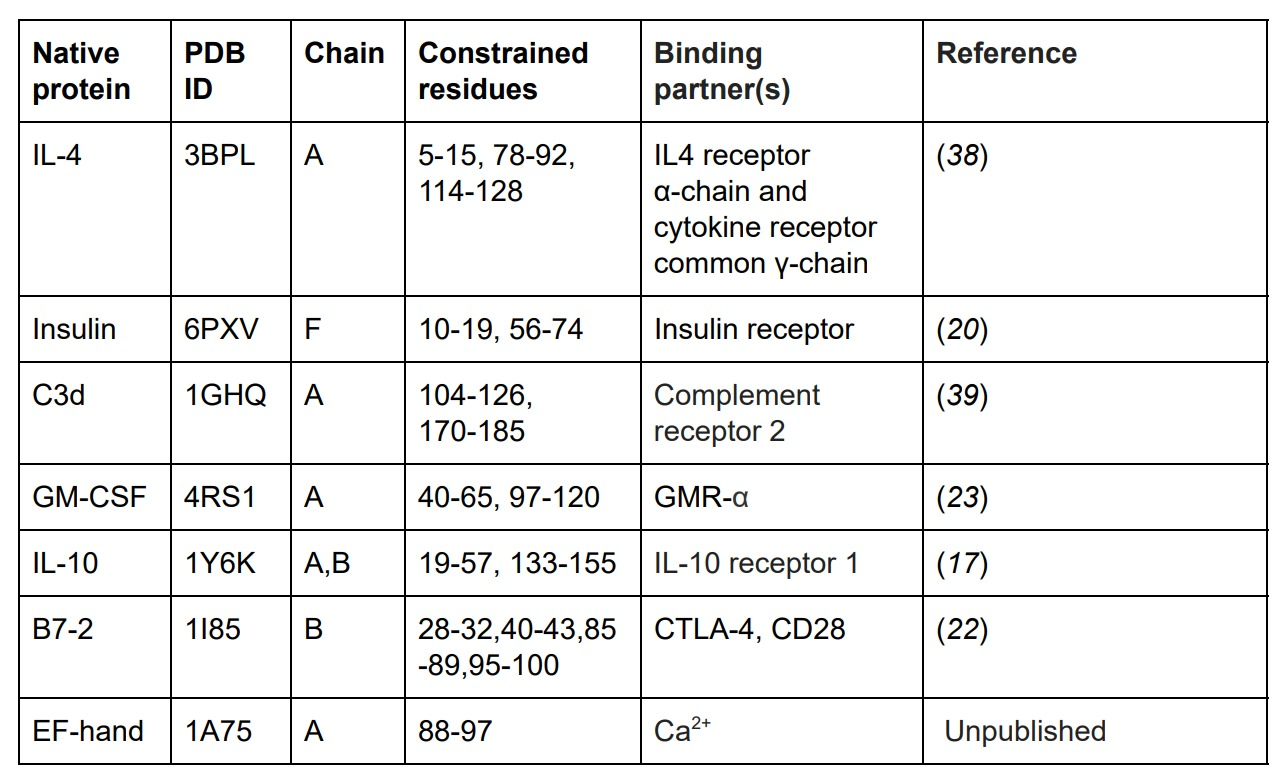

Above is natural proteins used for mimetic design in Tischer's paper. Pick three proteins from the list and write out how you would run Tischer's model for them to output five de nove protein sequences.Choose a reasonable size for output protein sequences. Explain all components in your code.

Protein 1

Explanation:

Protein 2

Explanation:

Protein 3

Explanation:

Choose a protein of your own interest and is not in the above table. Write out how you would run Tischer's model for them to output five de nove protein sequences. Attach links to the corresponding pdb file and literature reference for constrained residues. Explain your reason for choosing it and all the components in your code.

Protein Name

Explanation:

## Running trDesign

Here is an example of how to run [trDesign](https://github.com/gjoni/trDesign). The inputted sequence is one that was outputted by Tischer's model. The annealing schedule sets a starting temperature of 0.5 and divides the temperature in half every 4000 steps out of 20000 steps total.

In [ ]:
# Don't run this cell
python trDesign/01-hallucinate/hallucinate.py \
    -s MPPLDLDELNELMMLMCQCCMQCNPPNGKPHYCNCMAKGIIVKPKPKKDDDGGPSPPPKITVIIEILSIEHETKDGDGKKKYWYMHCLCMGCHAAPNWENYQENDPDLNDMKNSMDKTDVDEKFFMPCCHMPLKMPNCPNCHGSCEEANTPDDGNEHAEPCVAECAAEFLKWAKKLARLWGNWYPGKTKILIVLDPCCCC \
    --schedule=0.05,20000,2,4000 \
    --background=$bk --trrosetta=$tr \
    -o tem1_trdesign.fasta

Now, write out how you would run trDesign with the same input sequence but an initial temperature of 1.

Explain how to adjust starting temperature, step change of temperature, and number of steps, and in what situation we want to change them to a higher level or a lower level.

## Bash and SLURM

Tischer's model and trDesign both need a lot of computational power and memory to run! Don't expect to run them locally. Most (really all) of the time, you will run them on the Savio cluster by submitting jobs to "compute nodes."

### Bash
Make sure you are able to navigate directories, create directories, and move and copy files in bash.\
Spend 15-20 minutes playing [MIT's Terminus](https://web.mit.edu/mprat/Public/web/Terminus/Web/main.html) game.\
Check out this [slideshow](https://docs.google.com/presentation/d/1boVusmyiLk9T377mQGUjkPIqmUBjNpY9X1X7g_3FrfQ/edit?usp=sharing).

### SLURM
An example job script, job.sh, is shown below.

In [ ]:
# Don't run this cell

#!/bin/bash
#SBATCH --job-name=tem1_trdesign
#SBATCH --account=fc_igemcomp
#SBATCH --partition=savio2
#SBATCH --nodes=1
#SBATCH --time=35:00:00

# Your working directory
export WDIR=/global/scratch/users/YOUR_USERNAME/hsf
cd $WDIR

# Activate virtual env
module load python
source activate conda/hsf

date

bk=/global/scratch/users/YOUR_USERNAME/hsf/trDesign/background/bkgr2019_05
tr=/global/scratch/users/YOUR_USERNAME/hsf/trDesign/trRosetta/model2019_07

# Running hallucinated de novo sequence for TEM1 beta-lactamase through trDesign
python trDesign/01-hallucinate/hallucinate.py \
    -s MPPLDLDELNELMMLMCQCCMQCNPPNGKPHYCNCMAKGIIVKPKPKKDDDGGPSPPPKITVIIEILSIEHETKDGDGKKKYWYMHCLCMGCHAAPNWENYQENDPDLNDMKNSMDKTDVDEKFFMPCCHMPLKMPNCPNCHGSCEEANTPDDGNEHAEPCVAECAAEFLKWAKKLARLWGNWYPGKTKILIVLDPCCCC \
    --schedule=0.05,20000,2,4000 \
    --background=$bk --trrosetta=$tr \
    -o tem1_trdesign.fasta

date

# Deactivate virtual env
source deactivate

Copy the job script into the empty cell below, and make the following changes:
* You're worried your job won't finish in time, and will be stopped prematurely. Increase the time by 12 hours.
* You want to run your job on a node from the savio3 partition, which is faster and has more cpus. Make this change.

job.sh is submitted as follows.

In [ ]:
# Don't run this cell
sbatch job.sh arg1 arg2

To monitor your job, use

In [ ]:
# Don't run this cell
squeue -u YOUR_USERNAME
# or
sq

## AlphaFold

AlphaFold predicts the structure of your protein from its amino acid sequence. You can run it in this [Google Colab notebook](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb). You can only leave the page until the job finishes. Otherwise, you will lose your results and data.

Read through [this page](https://alphafold.ebi.ac.uk/faq#faq-5)  and answer the following questions in your own words and to your best ability.

What outputs are included on a structure page?

How many models will be generated at a time? 

What is pLDDT? Explain how to interpret/use the data.

What is Predicted Aligned Error? Explain how to interpret/use the data.

What are used for confidence estimation? What statistics correspond to high confidence/accuracy?

Try running AlphaFold on the sequence of [TEM-1](https://www.rcsb.org/3d-view/1BTL). Then try running AlphaFold on the sequence inputted to trDesign above. Compare the outputted structures and pLDDT. What do you notice?

From the above table, pick the same three proteins and input their sequences into AlphaFold and generate results. Paste the predicted structures you have.

Protein 1

Protein 2

Protein 3

### TEM-1 beta-lactamase Example

Below are the TEM-1 beta-lactamase outputs from Tischer's model, and the sequential refined output of Tischer's Model by trDesign.

Tischer's model output:
KDPEDQNAAQQENNYENQEQCMLAALKLALKALKALLKKGPPVTLTVDCPCAAAMCNSPCGEQRRMSPGSPKCCALAFAPIGLDRDVEVEQGSCRADDEPTISDNKFTLTVKDLGGKPVKLTLKNVPTDYYCACFPLCWLHMLYMILMMYRRMLRQPRKRKPPPKKPPPPKKKKKKPKDDDDDKPKKKGPKK

trDesign refinement output:
SKPYHEITLQFSFYCYVDRSCRQACAEWMRKFLQLVQEILEIFRWAGFKVEVHVQIEMRCYVFDDDTAPGHQGPYYFCDWTIQITWRIRDPRDGRDFEIKVTARCSCYVWPDRPYCCCFMEVSLHIVIPPNTKEEAMDVARDIYAAIMSLVQEFCQQMMNECAQRCNCDRIFCVFKIHTITIVP

Run both of these sequences through Alphafold side by side. 
Visually inspect the outputted protein model and compare the pLDDT of both outputs and note down key differences. 

## Future Direction

One of our project's prevailing goals is to discover a method to confirm/validate the viablility of a de novo protein sequence output in silico. We mark this goal as a milestone in our pursuit of a better understanding of the dynamics of trDesign and its quantitative effects on the protein sequence though free hallucination. Having a better understanding of these algorithms edges us closer to our ultimate goal, that is, to be able to generate a de novo protein sequence that is viable in the wetlab, carrying out the function of its original protein. 

The current method we are thinking of is to compare the pLDDT score for both outputs (from Tischer's model and trDesign) using novel code program. How would you approach creating a program to compare the pLDDT's from both outputs? How would you computationally extract the pLDDT's from the AlphaFold outputs? Write down your thoughts and/or any conceptual pseudocode below. 

## Comments
Feel free to write down your ideas for improving the project, such as using other programs for protein prediction, adding more components into consideration, etc.
